# What's in this notebook?
Developing and testing models.
- Models:
    - Logistic regression
    - KNN
    - SVM
    - Random Forest
    - XGBoost
    
- Evaluation Metrics:
    - ROC-AUC
    - Accuracy score
    - F1 score
    
- Other things to note:
    - PCA used in conjunction with models

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# I'll import sklearn models as needed

In [31]:
with open('model_data.pickle', 'rb') as f:
    data = pickle.load(f)

In [69]:
pd.set_option('display.max_columns', 500)

In [71]:
len(data.columns)

26

In [32]:
data[data.isnull().any(axis=1)]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,sec_duration_range,seg_duration_range,sec_loudness_range,sec_key_range,sec_tempo_range,sec_mode_range,sec_time_signature_range,no_unique_pitches,no_unique_timbres,mean_pitch
id,,,,,,,,,,,,,,,,,,,,,
4cCio6f3kmmufjWVsEfMu0,0.964,0.294,16027,0.0783,0.923,0,0.597,-23.044,1,0.0400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328,130,0.319427
6AyIvQ7Npap06gZzsHU3Hy,0.927,0.179,15427,0.1410,0.916,7,0.189,-21.892,0,0.0555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347,160,0.387112


In [33]:
data.drop(['4cCio6f3kmmufjWVsEfMu0', '6AyIvQ7Npap06gZzsHU3Hy'], inplace=True)

In [34]:
X = data.drop('ballet', axis=1)
y = data['ballet']

In [35]:
from sklearn.preprocessing import StandardScaler
# scaling data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))
columns = set(data.columns) - {'ballet'}
X_scaled.columns = columns
X_scaled


/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hannah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,no_unique_timbres,tempo,valence,danceability,instrumentalness,duration_ms,acousticness,speechiness,sec_time_signature_range,seg_duration_range,...,sec_key_range,liveness,time_signature,sec_mode_range,sec_duration_range,no_unique_pitches,no_segments,mean_pitch,mode,no_sections
0,0.381652,-0.868784,-0.647385,-1.020334,0.961208,-0.597610,-0.345203,-3.066970,0.661342,-0.399516,...,-0.114207,-0.114207,-0.751827,-0.206105,-0.293466,0.466921,-0.695168,-0.311422,-0.049848,-0.230527
1,-3.916531,-0.868784,-0.816355,-0.581445,0.636082,-1.174172,-0.418860,-2.066163,0.661342,-0.250176,...,-0.616202,-0.616202,-0.902028,-0.585274,-0.550939,0.466921,-0.695168,-0.477337,-1.275272,-0.303023
2,0.566415,-1.271590,-0.650258,-0.380097,0.569852,1.708639,3.735404,-0.018884,-1.512077,-0.360216,...,-0.614479,-0.614479,0.348017,0.552233,-0.621966,0.466921,-0.695168,0.131017,-0.301217,0.188947
3,0.391376,0.828753,-0.828020,1.725991,-1.462189,0.843796,4.663484,0.347440,-1.512077,-0.175506,...,-1.294138,-1.294138,-0.875000,0.173064,-0.641776,0.466921,0.617859,-0.138594,-0.254085,0.222484
4,0.673384,0.713665,-0.918203,1.793956,0.726394,1.132077,-0.433591,-0.151547,0.661342,0.614424,...,-0.860099,-0.860099,-0.646890,-1.343613,-0.608379,-2.141691,-0.695168,-0.581033,-0.615428,-0.555043
5,0.371927,-1.134924,-0.072567,-0.671500,0.774561,1.132077,0.796483,-0.731865,0.661342,-0.301266,...,-0.300452,-0.300452,-0.499783,-0.206105,-0.515867,0.466921,1.274372,0.587282,0.484312,0.517400
6,0.595588,-1.142117,-0.640317,-0.900884,-1.170177,1.132077,1.555152,-1.407847,-1.512077,0.048504,...,-1.064762,-1.064762,-0.968621,0.931402,-0.635773,0.466921,0.617859,-1.085690,0.500022,-1.069639
7,0.498344,0.116650,-0.646282,0.715001,0.503623,-0.885891,0.752289,-0.325042,0.661342,-0.037956,...,-0.798268,-0.798268,-0.822735,-0.585274,-0.567937,0.466921,-1.351682,0.310758,-0.364059,0.349508
8,0.780352,-0.127910,-0.913520,-1.040214,-0.122547,1.420358,0.258786,-2.457153,0.661342,-0.049746,...,-1.318813,-1.318813,-1.190055,-0.585274,-0.793056,-2.141691,-0.695168,-3.083578,-0.772534,-3.736436
9,0.391376,-1.490256,-0.324250,-0.888140,0.792624,1.708639,-0.455688,-1.476179,0.661342,-0.085116,...,0.187176,0.187176,-0.600975,0.552233,1.006568,0.466921,0.617859,0.213974,0.028705,0.239879


## Functions Used All Over

In [298]:
# function to evaluate models

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

def evaluation(y_test, y_pred):
    print('classification report: \n')
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    
    
# from sklearn
def plot_roc_curve(y_test, y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # Plot of a ROC curve for a specific class
    plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# directly taken from sklearn documentation
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plt_cm():
    
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=['non-ballet', 'ballet'],
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=['non-ballet', 'ballet'], normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

## Basic Models
All data thrown into the basic model, just to see what happens.

### Dummy Classifier -- Used for Baseline Comparisons

classification report: 

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       215
           1       0.50      0.49      0.49       210

   micro avg       0.51      0.51      0.51       425
   macro avg       0.51      0.51      0.51       425
weighted avg       0.51      0.51      0.51       425

ROC AUC: 0.5056478405315614
Accuracy score: 0.5058823529411764


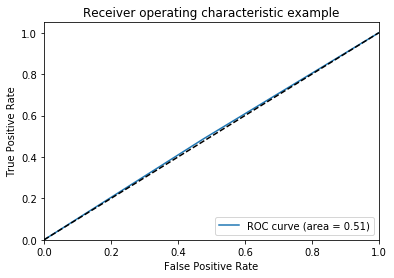

Confusion matrix, without normalization
[[113 102]
 [108 102]]
Normalized confusion matrix
[[0.5255814  0.4744186 ]
 [0.51428571 0.48571429]]


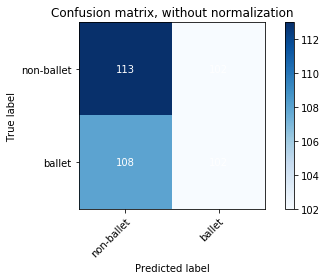

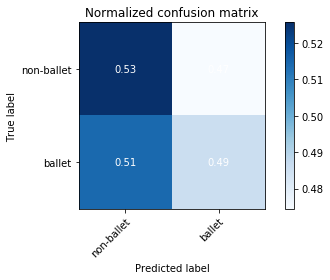

In [299]:
from sklearn.dummy import DummyClassifier
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

dc = DummyClassifier()
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

plt_cm()

### Logistic Regression

In [300]:
from sklearn.model_selection import train_test_split
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [301]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [302]:
coefs = {X_scaled.columns[i]: lr.coef_[0][i] for i in range (len(lr.coef_[0]))}
coefs

{'no_unique_timbres': -0.0809215629759104,
 'tempo': 0.1298113896062884,
 'valence': -1.5970014888784207,
 'danceability': -0.06548472702465596,
 'instrumentalness': 0.07591734104412191,
 'duration_ms': 0.09373171212513265,
 'acousticness': 0.3981428317384476,
 'speechiness': -0.03295304071578723,
 'sec_time_signature_range': 0.16578279981599361,
 'seg_duration_range': 0.04261170554647233,
 'sec_tempo_range': 0.0780097898424133,
 'sec_loudness_range': 0.031085584769035186,
 'energy': -0.1802578782587597,
 'key': 0.5490815555359821,
 'loudness': -1.422808074514123,
 'sec_key_range': -0.24980193734109948,
 'liveness': -0.24980193734109948,
 'time_signature': -0.18187726723275513,
 'sec_mode_range': 0.06124123946409796,
 'sec_duration_range': 0.16561093760674808,
 'no_unique_pitches': -0.10238250404269321,
 'no_segments': 0.045884099709049685,
 'mean_pitch': 0.7870807881945402,
 'mode': -0.6302631460934892,
 'no_sections': -0.49703779968968487}

classification report: 

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       215
           1       0.79      0.80      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7954042081949059
Accuracy score: 0.7952941176470588


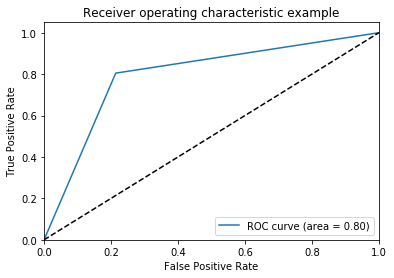

Confusion matrix, without normalization
[[169  46]
 [ 41 169]]
Normalized confusion matrix
[[0.78604651 0.21395349]
 [0.1952381  0.8047619 ]]


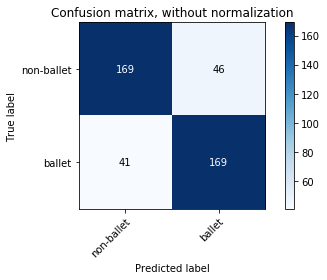

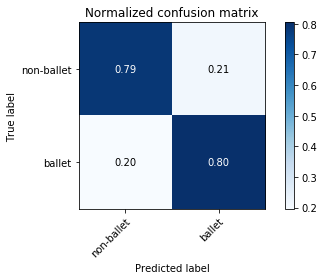

In [303]:
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
plt_cm()

Well that was unexpected... It's surprisingly high without being so eerily accurate that I suspect overfitting... Let's see how all the other models fair!

### KNN

In [304]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

classification report: 

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       215
           1       0.80      0.75      0.78       210

   micro avg       0.79      0.79      0.79       425
   macro avg       0.79      0.79      0.79       425
weighted avg       0.79      0.79      0.79       425

ROC AUC: 0.7854928017718714
Accuracy score: 0.7858823529411765


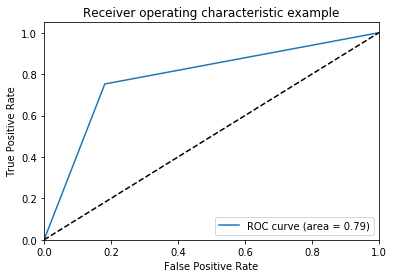

Confusion matrix, without normalization
[[176  39]
 [ 52 158]]
Normalized confusion matrix
[[0.81860465 0.18139535]
 [0.24761905 0.75238095]]


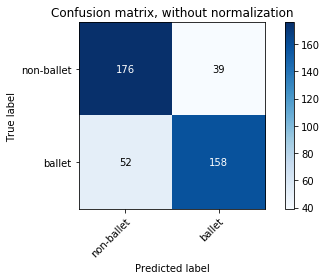

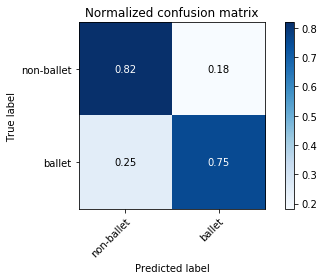

In [305]:
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
plt_cm()

### SVM

In [306]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [307]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


classification report: 

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       215
           1       0.81      0.82      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8165559246954597
Accuracy score: 0.8164705882352942


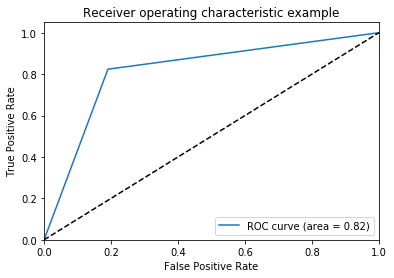

Confusion matrix, without normalization
[[174  41]
 [ 37 173]]
Normalized confusion matrix
[[0.80930233 0.19069767]
 [0.17619048 0.82380952]]


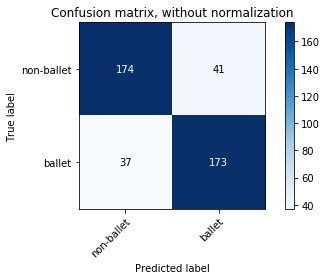

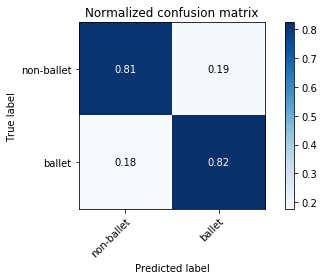

In [308]:
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
plt_cm()

### Random Forest

In [309]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [310]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classification report: 

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       215
           1       0.81      0.79      0.80       210

   micro avg       0.81      0.81      0.81       425
   macro avg       0.81      0.81      0.81       425
weighted avg       0.81      0.81      0.81       425

ROC AUC: 0.8068660022148394
Accuracy score: 0.8070588235294117


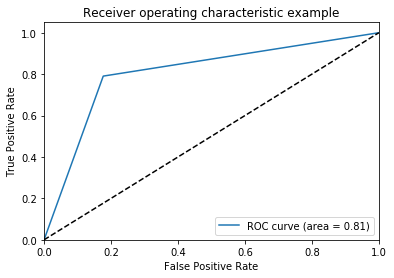

Confusion matrix, without normalization
[[177  38]
 [ 44 166]]
Normalized confusion matrix
[[0.82325581 0.17674419]
 [0.20952381 0.79047619]]


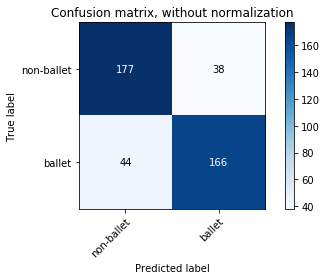

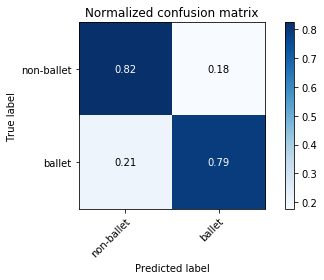

In [311]:
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
plt_cm()

### XGBoost

In [95]:
!pip install xgboost
import xgboost as xgb

    100% |████████████████████████████████| 686kB 6.6MB/s ta 0:00:01
  Stored in directory: /Users/hannah/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [312]:
# can use the train and test from Random Forest
xgbc = xgb.XGBRFClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

classification report: 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       215
           1       0.80      0.82      0.81       210

   micro avg       0.81      0.81      0.81       425
   macro avg       0.81      0.81      0.81       425
weighted avg       0.81      0.81      0.81       425

ROC AUC: 0.8095238095238095
Accuracy score: 0.8094117647058824


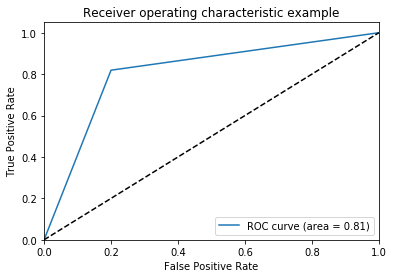

Confusion matrix, without normalization
[[172  43]
 [ 38 172]]
Normalized confusion matrix
[[0.8        0.2       ]
 [0.18095238 0.81904762]]


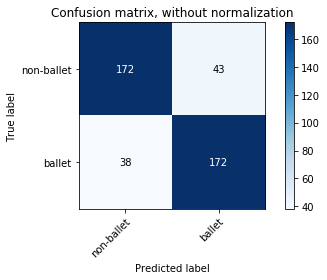

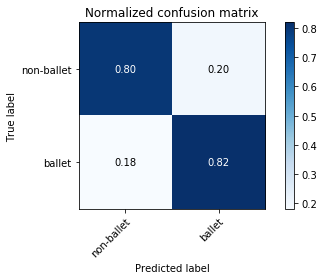

In [313]:
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
plt_cm()

## Parameter Tuning & Visualizations
- tuning parameters for each model
- visualizing ROC-AUC, feature importance (for interpretable models - logistic regression & random forest)

### Logistic Regression
Two grid searches were done -- one with l1 and l2 as penalty for the lbfgs solver, and the other with just l2, and the other solvers, since the other solvers only take l2 as the penalty.

In [315]:
from sklearn.model_selection import GridSearchCV

# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear'],
    'max_iter': [200, 500, 800, 1200, 1600]}
]

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.1s finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       215
           1       0.79      0.80      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7977297895902546
Accuracy score: 0.7976470588235294
None
{'C': 0.615848211066026, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion matrix, without normalization
[[170  45]
 [ 41 169]]
Normalized confusion matrix
[[0.79069767 0.20930233]
 [0.1952381  0.8047619 ]]


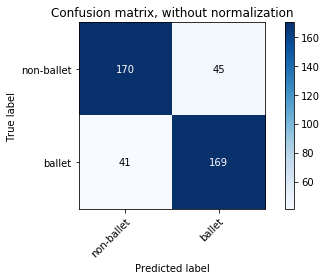

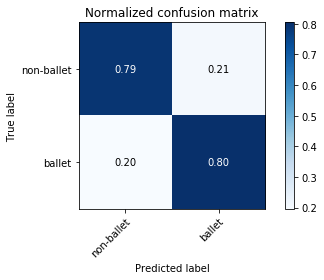

In [316]:
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)
plt_cm()

In [138]:
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = [
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [200, 500, 800, 1200, 1600]}
]

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 1925 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 2353 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2493 out of 2500 | elapsed:  1.9min remaining:    0.3s


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       215
           1       0.79      0.80      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.7977297895902546
Accuracy score: 0.7976470588235294
None
{'C': 4.281332398719396, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}


[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.9min finished
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


It makes some sense that the maximum iterations that winds up with the best results is 200, since more than that may overfit to the training data. So we'll keep max_iter=200.

In [140]:
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = [
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
]

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    4.3s


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       215
           1       0.79      0.81      0.80       210

   micro avg       0.80      0.80      0.80       425
   macro avg       0.80      0.80      0.80       425
weighted avg       0.80      0.80      0.80       425

ROC AUC: 0.800110741971207
Accuracy score: 0.8
None
{'C': 1438.44988828766, 'penalty': 'l2', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.5s finished
/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


However, because it doesn't converge, you get different values for C every time, so it looks like we should stick with `{'C': 0.615848211066026, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}` as the parameters for the best-tuned Logistic Regression model.

### KNN

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   28.6s finished


classification report: 

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       215
           1       0.76      0.76      0.76       210

   micro avg       0.76      0.76      0.76       425
   macro avg       0.76      0.76      0.76       425
weighted avg       0.76      0.76      0.76       425

ROC AUC: 0.7646179401993355
Accuracy score: 0.7647058823529411
None
{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


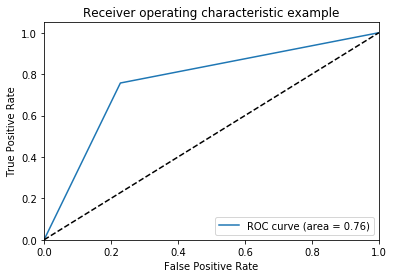

Confusion matrix, without normalization
[[166  49]
 [ 51 159]]
Normalized confusion matrix
[[0.77209302 0.22790698]
 [0.24285714 0.75714286]]


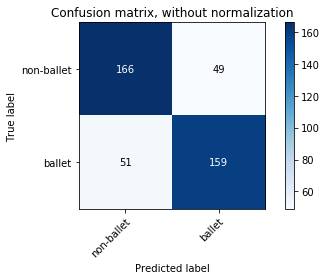

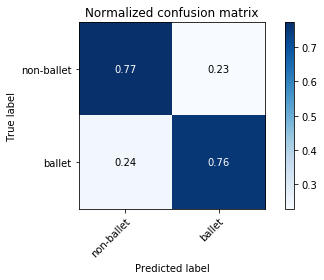

In [342]:
# use scaled data for interpretability
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = [
    {'n_neighbors': list(range(1, 30, 2)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]}
]

# Create grid search object
clf = GridSearchCV(KNeighborsClassifier() , param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)
plot_roc_curve(y_test, y_pred)
plt_cm()

### SVM

In [163]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf'] 
             }


# Create grid search object
clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  7.4min finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       215
           1       0.84      0.80      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8232004429678847
Accuracy score: 0.8235294117647058
None
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [172]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'C':[1000, 1500],
              'gamma':[1,0.1,0.001], 
              'kernel':['linear','rbf'] 
             }


# Create grid search object
clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.2min finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       215
           1       0.84      0.80      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8232004429678847
Accuracy score: 0.8235294117647058
None
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [195]:
# need to use scaled data for SVMs
# have random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'C':[1000, 1500],
              'gamma':[1,0.1,0.001], 
              'kernel':['rbf', 'sigmoid', 'poly'] 
             }


# Create grid search object
clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.1s finished


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       215
           1       0.84      0.80      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8232004429678847
Accuracy score: 0.8235294117647058
None
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


classification report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       215
           1       0.84      0.80      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8232004429678847
Accuracy score: 0.8235294117647058
None


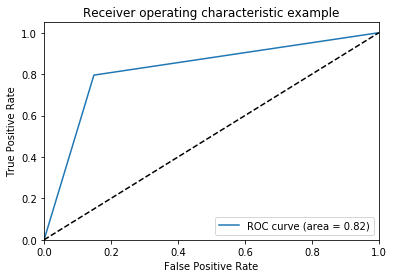

Confusion matrix, without normalization
[[183  32]
 [ 43 167]]
Normalized confusion matrix
[[0.85116279 0.14883721]
 [0.2047619  0.7952381 ]]


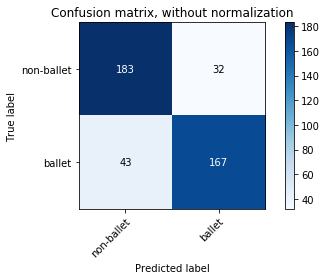

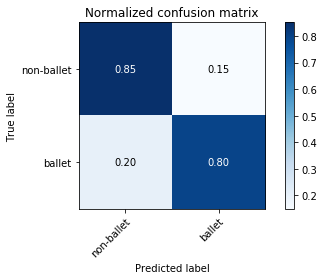

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
svc = SVC(C=1000, gamma=0.001, kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(evaluation(y_test, y_pred))
plot_roc_curve(y_test, y_pred)
plt_cm()

### Random Forest

In [317]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [171]:
# Create param grid.
param_grid = {'max_depth': [1, 10],
            'max_features': [1, 2, 4, 16],
            'min_samples_leaf': [2, 10, 100, 500, 1000],
            'min_samples_split': [2, 10, 100, 500, 1000],
            'n_estimators': [100, 500, 1000]
             }


# Create grid search object
clf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 18.1min finished


classification report: 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       215
           1       0.81      0.83      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8213178294573644
Accuracy score: 0.8211764705882353
None
{'max_depth': 10, 'max_features': 16, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


classification report: 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       215
           1       0.82      0.82      0.82       210

   micro avg       0.82      0.82      0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425

ROC AUC: 0.8211517165005537
Accuracy score: 0.8211764705882353


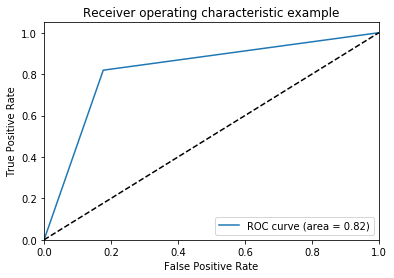

Confusion matrix, without normalization
[[177  38]
 [ 38 172]]
Normalized confusion matrix
[[0.82325581 0.17674419]
 [0.18095238 0.81904762]]


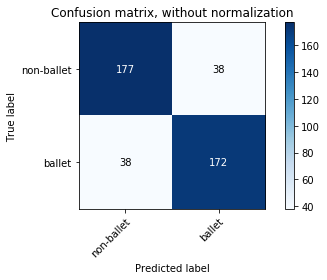

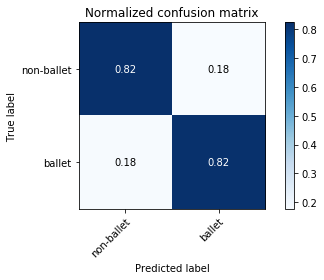

In [318]:
rfc = RandomForestClassifier(max_depth=10, max_features=15, 
                             min_samples_leaf=10, min_samples_split=10,
                            n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
plt_cm()

### XGBoost

In [175]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'max_depth': [3, 10, 100], 
              'learning_rate': [.01, .1, 1, 10], 
              'n_estimators': [10, 100, 1000]
             }


# Create grid search object
clf = GridSearchCV(xgb.XGBRFClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


classification report: 

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       215
           1       0.81      0.81      0.81       210

   micro avg       0.81      0.81      0.81       425
   macro avg       0.81      0.81      0.81       425
weighted avg       0.81      0.81      0.81       425

ROC AUC: 0.8117940199335548
Accuracy score: 0.8117647058823529
None
{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}


In [319]:
# using non-scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Create param grid.
param_grid = {'max_depth': [5, 10, 20, 50], 
              'learning_rate': [.001, .01, .1], 
              'n_estimators': [10, 100, 200, 500]
             }


# Create grid search object
clf = GridSearchCV(xgb.XGBClassifier(), param_grid = param_grid, cv = 5, verbose=True, 
                   n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
print(evaluation(y_test, y_pred))
print(clf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.4min finished


classification report: 

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       215
           1       0.83      0.83      0.83       210

   micro avg       0.83      0.83      0.83       425
   macro avg       0.83      0.83      0.83       425
weighted avg       0.83      0.83      0.83       425

ROC AUC: 0.8306201550387597
Accuracy score: 0.8305882352941176
None
{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}


classification report: 

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       215
           1       0.83      0.83      0.83       210

   micro avg       0.83      0.83      0.83       425
   macro avg       0.83      0.83      0.83       425
weighted avg       0.83      0.83      0.83       425

ROC AUC: 0.8306201550387597
Accuracy score: 0.8305882352941176


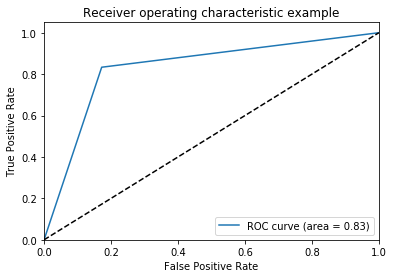

Confusion matrix, without normalization
[[178  37]
 [ 35 175]]
Normalized confusion matrix
[[0.82790698 0.17209302]
 [0.16666667 0.83333333]]


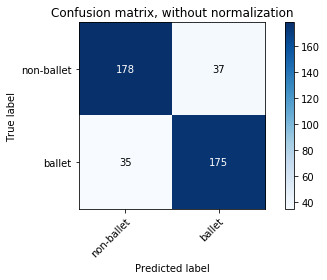

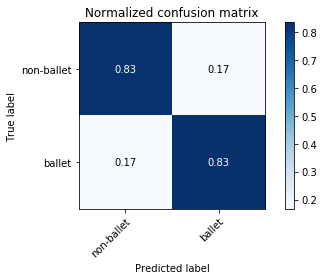

In [326]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(learning_rate=0.1, max_depth=20, n_estimators=100)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
evaluation(y_test, y_pred)
plot_roc_curve(y_test, y_pred)
plt.
plt_cm()


### Results:
It comes down to the SVM, Random Forest, and XGBoost models. Given that the blackbox models only perform _slightly_ better than Random Forest, I'll choose the simpler model and dig into what that tells us. 

## Feature Selection -- Due to lack of time, results were not utilized.
- PCA
- Regularization
- New visuals if better models are found

### PCA

In [234]:
from sklearn.decomposition import PCA

pca = PCA()

# using scaled data, since we're looking at variance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

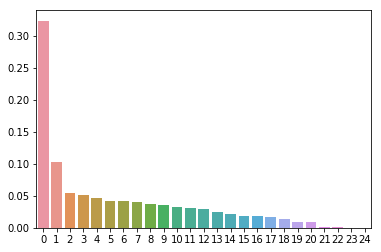

In [235]:
sns.barplot(list(range(len(pca.components_))), pca.explained_variance_ratio_)

In [248]:
sum(pca.explained_variance_ratio_[:20])

0.9893455522978218

This tells us that 99% of variance is explained by 20 components -- a 25-dimensional space can be represented by 20 components. 

In [236]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

loading_scores = [eig_vectors[i] * np.sqrt(eig_values[i]) for i in range(len(pca.components_))]
for score in loading_scores:
    display(pd.Series(score, index=X.columns).sort_values(ascending=False))

duration_ms                 0.883582
no_segments                 0.872519
no_sections                 0.868913
no_unique_pitches           0.837870
mean_pitch                  0.821977
no_unique_timbres           0.780594
sec_duration_range          0.779588
seg_duration_range          0.779588
sec_loudness_range          0.704651
sec_time_signature_range    0.686624
sec_key_range               0.670761
sec_mode_range              0.516077
sec_tempo_range             0.385387
instrumentalness            0.088303
acousticness                0.028456
time_signature              0.024931
loudness                    0.006720
key                        -0.041003
speechiness                -0.042603
mode                       -0.111957
energy                     -0.143969
tempo                      -0.172547
liveness                   -0.207697
danceability               -0.528154
valence                    -0.606147
dtype: float64

energy                      0.866918
loudness                    0.802998
danceability                0.517252
valence                     0.517092
liveness                    0.319993
mean_pitch                  0.305208
tempo                       0.280282
no_unique_pitches           0.275177
speechiness                 0.211686
no_segments                 0.177934
time_signature              0.162144
seg_duration_range          0.104110
sec_duration_range          0.104110
duration_ms                 0.099275
no_sections                 0.085774
instrumentalness            0.071710
sec_mode_range              0.023991
sec_key_range               0.018656
sec_loudness_range          0.014123
sec_tempo_range            -0.003442
key                        -0.011142
no_unique_timbres          -0.040307
mode                       -0.067455
sec_time_signature_range   -0.209469
acousticness               -0.281093
dtype: float64

speechiness                 0.392426
sec_duration_range          0.282252
seg_duration_range          0.282252
mode                        0.228183
sec_tempo_range             0.165802
duration_ms                 0.151005
no_segments                 0.127241
liveness                    0.105022
no_sections                 0.100021
valence                     0.088976
sec_time_signature_range    0.042557
danceability               -0.018545
tempo                      -0.023414
sec_loudness_range         -0.045942
energy                     -0.073220
key                        -0.074895
no_unique_timbres          -0.093231
time_signature             -0.120206
no_unique_pitches          -0.137761
mean_pitch                 -0.145874
loudness                   -0.191620
sec_key_range              -0.275415
sec_mode_range             -0.349484
acousticness               -0.507193
instrumentalness           -0.562783
dtype: float64

sec_mode_range              0.364122
liveness                    0.345121
speechiness                 0.240142
key                         0.172689
sec_time_signature_range    0.167514
sec_key_range               0.161733
sec_tempo_range             0.156804
energy                      0.103834
mean_pitch                  0.055749
no_unique_pitches           0.044051
sec_loudness_range          0.043520
loudness                   -0.020663
instrumentalness           -0.088430
sec_duration_range         -0.119287
seg_duration_range         -0.119287
no_unique_timbres          -0.132833
tempo                      -0.142691
no_sections                -0.182718
duration_ms                -0.191651
no_segments                -0.204262
valence                    -0.208283
time_signature             -0.211011
danceability               -0.242302
acousticness               -0.455685
mode                       -0.554067
dtype: float64

tempo                       0.478680
danceability                0.290641
speechiness                 0.265336
sec_mode_range              0.260683
no_unique_timbres           0.229190
key                         0.222756
sec_key_range               0.217776
time_signature              0.134251
acousticness                0.106517
valence                     0.103229
no_unique_pitches           0.086675
mean_pitch                  0.076805
no_sections                 0.041337
no_segments                 0.034959
duration_ms                -0.011729
sec_loudness_range         -0.047817
sec_time_signature_range   -0.048033
sec_tempo_range            -0.092923
mode                       -0.129990
energy                     -0.170824
seg_duration_range         -0.177815
sec_duration_range         -0.177815
loudness                   -0.196875
liveness                   -0.242142
instrumentalness           -0.532013
dtype: float64

time_signature              0.523002
speechiness                 0.517291
liveness                    0.274055
acousticness                0.217339
sec_mode_range              0.137996
no_unique_timbres           0.134791
instrumentalness            0.103265
seg_duration_range          0.065606
sec_duration_range          0.065606
danceability                0.045767
mean_pitch                 -0.016815
sec_key_range              -0.022383
sec_time_signature_range   -0.023910
energy                     -0.030211
no_unique_pitches          -0.030216
mode                       -0.044957
duration_ms                -0.051848
no_segments                -0.058228
no_sections                -0.070457
sec_loudness_range         -0.088494
sec_tempo_range            -0.104812
valence                    -0.112160
loudness                   -0.132464
tempo                      -0.178789
key                        -0.485171
dtype: float64

key                         0.564206
time_signature              0.444674
seg_duration_range          0.168746
sec_duration_range          0.168746
duration_ms                 0.117207
no_segments                 0.104585
valence                     0.087875
no_sections                 0.077616
danceability                0.074317
acousticness                0.012408
liveness                   -0.004306
no_unique_timbres          -0.022436
loudness                   -0.028788
energy                     -0.043155
instrumentalness           -0.050563
sec_mode_range             -0.056720
sec_loudness_range         -0.087774
sec_key_range              -0.093054
mean_pitch                 -0.123429
no_unique_pitches          -0.124022
speechiness                -0.132177
sec_tempo_range            -0.150930
sec_time_signature_range   -0.151110
mode                       -0.383335
tempo                      -0.383655
dtype: float64

liveness                    0.411493
key                         0.297958
speechiness                 0.254731
mode                        0.226548
no_unique_timbres           0.175615
no_sections                 0.163933
acousticness                0.152718
no_segments                 0.150972
duration_ms                 0.142946
sec_time_signature_range    0.130075
instrumentalness            0.085148
danceability                0.061456
sec_key_range               0.049799
mean_pitch                  0.017889
no_unique_pitches           0.010308
energy                     -0.005780
valence                    -0.023908
loudness                   -0.031921
sec_mode_range             -0.073926
seg_duration_range         -0.153453
sec_duration_range         -0.153453
sec_loudness_range         -0.161712
tempo                      -0.189151
time_signature             -0.379409
sec_tempo_range            -0.456809
dtype: float64

sec_tempo_range             0.540421
speechiness                 0.413611
key                         0.391064
acousticness                0.329053
instrumentalness            0.251250
danceability                0.114065
seg_duration_range          0.108852
sec_duration_range          0.108852
no_unique_timbres           0.092563
sec_loudness_range          0.081960
mode                        0.061590
energy                      0.058372
sec_time_signature_range    0.052861
tempo                       0.017463
valence                     0.003390
sec_key_range              -0.010562
loudness                   -0.015625
mean_pitch                 -0.028619
no_unique_pitches          -0.035643
liveness                   -0.089661
no_segments                -0.115609
time_signature             -0.116930
duration_ms                -0.128549
no_sections                -0.138953
sec_mode_range             -0.157948
dtype: float64

acousticness                0.216626
danceability                0.172938
seg_duration_range          0.169953
sec_duration_range          0.169953
valence                     0.128454
duration_ms                 0.075024
no_segments                 0.074063
no_unique_timbres           0.069772
speechiness                 0.062989
sec_mode_range              0.059649
no_sections                 0.042469
loudness                    0.025511
instrumentalness            0.023939
energy                     -0.006860
tempo                      -0.027363
sec_time_signature_range   -0.028186
sec_tempo_range            -0.104321
sec_loudness_range         -0.129189
no_unique_pitches          -0.130168
sec_key_range              -0.131056
mean_pitch                 -0.135463
liveness                   -0.189977
key                        -0.292624
time_signature             -0.481735
mode                       -0.528255
dtype: float64

tempo                       0.538233
instrumentalness            0.323774
liveness                    0.252911
no_sections                 0.222305
duration_ms                 0.201829
no_segments                 0.168685
time_signature              0.109192
sec_loudness_range          0.085694
sec_tempo_range             0.064083
speechiness                 0.031777
key                         0.031099
sec_time_signature_range   -0.041637
no_unique_timbres          -0.051004
acousticness               -0.068393
valence                    -0.073274
seg_duration_range         -0.086646
sec_duration_range         -0.086646
loudness                   -0.094298
energy                     -0.107601
sec_key_range              -0.113990
danceability               -0.129621
sec_mode_range             -0.157457
no_unique_pitches          -0.165856
mean_pitch                 -0.169391
mode                       -0.237519
dtype: float64

speechiness                 0.307166
instrumentalness            0.240827
sec_loudness_range          0.153788
no_sections                 0.127491
duration_ms                 0.091810
no_segments                 0.074082
danceability                0.048997
time_signature              0.044365
energy                      0.042757
no_unique_timbres           0.011960
loudness                    0.004706
mean_pitch                  0.001791
sec_key_range               0.000403
no_unique_pitches          -0.003515
sec_time_signature_range   -0.014449
valence                    -0.018187
key                        -0.047761
mode                       -0.049582
sec_tempo_range            -0.094034
sec_mode_range             -0.142715
tempo                      -0.224087
sec_duration_range         -0.244742
seg_duration_range         -0.244742
acousticness               -0.311206
liveness                   -0.494679
dtype: float64

seg_duration_range          0.285268
sec_duration_range          0.285268
tempo                       0.280192
instrumentalness            0.212525
key                         0.145292
speechiness                 0.137962
mode                        0.070595
mean_pitch                  0.066185
no_unique_pitches           0.065959
energy                      0.047422
sec_key_range               0.031114
sec_mode_range              0.010497
time_signature             -0.023105
no_unique_timbres          -0.049913
loudness                   -0.054154
sec_time_signature_range   -0.069288
sec_loudness_range         -0.108910
duration_ms                -0.123280
danceability               -0.132031
no_segments                -0.147953
acousticness               -0.157471
valence                    -0.162697
no_sections                -0.187026
liveness                   -0.196092
sec_tempo_range            -0.426690
dtype: float64

loudness                    0.285219
sec_time_signature_range    0.235303
acousticness                0.207693
energy                      0.117196
no_unique_pitches           0.088042
time_signature              0.087284
mean_pitch                  0.080814
tempo                       0.067465
no_unique_timbres           0.050674
speechiness                 0.049156
key                         0.005320
no_segments                -0.024052
sec_loudness_range         -0.030320
no_sections                -0.041593
duration_ms                -0.049594
liveness                   -0.077509
sec_duration_range         -0.077881
seg_duration_range         -0.077881
sec_tempo_range            -0.096114
mode                       -0.170477
sec_key_range              -0.213868
valence                    -0.222584
danceability               -0.243357
instrumentalness           -0.248617
sec_mode_range             -0.335095
dtype: float64

sec_loudness_range          0.514855
sec_key_range               0.183624
liveness                    0.118131
acousticness                0.073237
danceability                0.071090
loudness                    0.059554
seg_duration_range          0.037287
sec_duration_range          0.037287
speechiness                 0.026707
no_unique_pitches          -0.011413
no_unique_timbres          -0.021642
mean_pitch                 -0.022620
key                        -0.031772
tempo                      -0.035402
duration_ms                -0.044910
no_sections                -0.055944
mode                       -0.060784
no_segments                -0.074866
time_signature             -0.077733
valence                    -0.088396
energy                     -0.089894
instrumentalness           -0.113140
sec_tempo_range            -0.140669
sec_mode_range             -0.199178
sec_time_signature_range   -0.286190
dtype: float64

sec_mode_range              0.314300
loudness                    0.278825
mode                        0.159182
sec_loudness_range          0.097076
speechiness                 0.093453
energy                      0.090195
duration_ms                 0.077928
acousticness                0.076733
no_sections                 0.067155
key                         0.051460
no_segments                 0.047608
sec_key_range               0.023511
sec_time_signature_range    0.020041
tempo                       0.017742
sec_duration_range          0.017731
seg_duration_range          0.017731
time_signature              0.009297
sec_tempo_range            -0.029598
instrumentalness           -0.087973
no_unique_timbres          -0.091599
liveness                   -0.091624
danceability               -0.106107
valence                    -0.134147
no_unique_pitches          -0.291377
mean_pitch                 -0.294939
dtype: float64

sec_mode_range              0.149674
mean_pitch                  0.139685
no_unique_pitches           0.134375
sec_tempo_range             0.084233
speechiness                 0.055921
no_segments                 0.053726
no_sections                 0.045711
key                         0.040188
acousticness                0.040133
duration_ms                 0.038488
mode                        0.036889
no_unique_timbres           0.035286
loudness                    0.012140
liveness                   -0.006285
energy                     -0.012831
instrumentalness           -0.032272
tempo                      -0.032546
seg_duration_range         -0.049423
sec_duration_range         -0.049423
sec_loudness_range         -0.064436
time_signature             -0.084935
valence                    -0.142756
danceability               -0.142965
sec_key_range              -0.304554
sec_time_signature_range   -0.462283
dtype: float64

sec_loudness_range          0.313076
sec_time_signature_range    0.218638
sec_mode_range              0.186284
danceability                0.141648
valence                     0.077699
key                         0.052992
no_unique_timbres           0.048087
mean_pitch                  0.042522
instrumentalness            0.041472
no_unique_pitches           0.039581
mode                        0.029416
liveness                    0.028566
tempo                       0.020878
time_signature              0.013131
sec_duration_range          0.006296
seg_duration_range          0.006296
acousticness               -0.027035
speechiness                -0.031588
duration_ms                -0.044099
loudness                   -0.051823
no_sections                -0.052044
no_segments                -0.052900
energy                     -0.058469
sec_tempo_range            -0.102918
sec_key_range              -0.429447
dtype: float64

valence                     0.207528
acousticness                0.185013
speechiness                 0.104899
mean_pitch                  0.100150
no_unique_pitches           0.079282
sec_loudness_range          0.073152
energy                      0.064011
no_sections                 0.056526
duration_ms                 0.052856
no_segments                 0.042002
sec_mode_range              0.036925
sec_time_signature_range    0.032805
sec_key_range               0.018556
key                         0.007339
time_signature             -0.001063
seg_duration_range         -0.006795
sec_duration_range         -0.006795
tempo                      -0.007995
mode                       -0.010731
instrumentalness           -0.028514
liveness                   -0.033036
sec_tempo_range            -0.050661
loudness                   -0.140381
danceability               -0.166892
no_unique_timbres          -0.405149
dtype: float64

no_unique_timbres           0.250160
valence                     0.218279
energy                      0.171935
sec_loudness_range          0.075949
sec_key_range               0.010015
tempo                       0.001665
time_signature              0.001157
mode                        0.000680
sec_mode_range              0.000226
acousticness                0.000058
key                        -0.001304
liveness                   -0.006866
seg_duration_range         -0.008959
sec_duration_range         -0.008959
speechiness                -0.014235
instrumentalness           -0.014926
no_segments                -0.019059
sec_tempo_range            -0.025852
duration_ms                -0.028675
no_sections                -0.032285
sec_time_signature_range   -0.045200
no_unique_pitches          -0.062104
mean_pitch                 -0.062593
loudness                   -0.102671
danceability               -0.246450
dtype: float64

loudness                    0.227695
valence                     0.204116
speechiness                 0.072081
instrumentalness            0.040276
no_unique_pitches           0.039218
no_unique_timbres           0.026821
mean_pitch                  0.016803
sec_key_range               0.015251
sec_mode_range              0.012867
liveness                    0.010509
sec_duration_range          0.008373
seg_duration_range          0.008373
time_signature              0.006409
key                         0.005784
mode                       -0.000480
sec_time_signature_range   -0.001210
sec_tempo_range            -0.002124
tempo                      -0.003004
no_sections                -0.022017
no_segments                -0.022925
duration_ms                -0.024478
sec_loudness_range         -0.027263
acousticness               -0.034708
danceability               -0.121933
energy                     -0.306142
dtype: float64

no_segments                 0.137755
sec_loudness_range          0.006799
no_unique_pitches           0.005691
instrumentalness            0.003667
sec_key_range               0.002935
sec_time_signature_range    0.001251
sec_mode_range              0.001031
speechiness                 0.000521
mode                        0.000477
tempo                      -0.000065
time_signature             -0.000099
sec_tempo_range            -0.000312
liveness                   -0.000327
key                        -0.000916
danceability               -0.002029
acousticness               -0.002151
loudness                   -0.003230
valence                    -0.004028
energy                     -0.005475
no_unique_timbres          -0.005854
seg_duration_range         -0.006166
sec_duration_range         -0.006166
mean_pitch                 -0.012532
duration_ms                -0.024889
no_sections                -0.104840
dtype: float64

duration_ms                 0.088979
mean_pitch                  0.013958
no_unique_timbres           0.002244
sec_tempo_range             0.002203
tempo                       0.001259
sec_key_range               0.001173
acousticness                0.001137
valence                     0.001084
loudness                    0.000831
danceability                0.000728
sec_time_signature_range    0.000496
key                         0.000099
sec_mode_range              0.000089
mode                        0.000049
time_signature              0.000037
liveness                   -0.000336
speechiness                -0.000451
energy                     -0.000591
sec_loudness_range         -0.001233
instrumentalness           -0.001286
sec_duration_range         -0.005432
seg_duration_range         -0.005432
no_unique_pitches          -0.009596
no_segments                -0.027486
no_sections                -0.059083
dtype: float64

mean_pitch                  0.058053
no_segments                 0.007873
no_sections                 0.002837
loudness                    0.001534
no_unique_timbres           0.001226
sec_duration_range          0.000711
seg_duration_range          0.000711
sec_loudness_range          0.000587
tempo                       0.000439
sec_key_range               0.000408
sec_time_signature_range   -0.000045
mode                       -0.000078
valence                    -0.000095
key                        -0.000144
time_signature             -0.000268
sec_tempo_range            -0.000319
liveness                   -0.000416
instrumentalness           -0.000438
speechiness                -0.000592
sec_mode_range             -0.000680
danceability               -0.000685
acousticness               -0.000719
energy                     -0.003095
duration_ms                -0.011226
no_unique_pitches          -0.059963
dtype: float64

sec_duration_range          1.491177e-16
no_unique_pitches           1.258358e-31
danceability                5.837598e-32
sec_loudness_range          4.607847e-32
key                         4.346788e-32
mode                        2.167634e-32
valence                     1.270690e-32
duration_ms                 8.771819e-33
acousticness                7.385748e-33
sec_mode_range              4.980962e-33
speechiness                 3.739985e-33
no_unique_timbres           2.697191e-33
liveness                   -4.435253e-33
instrumentalness           -5.672395e-33
energy                     -5.702678e-33
no_segments                -9.216181e-33
sec_key_range              -1.090009e-32
loudness                   -1.365891e-32
sec_tempo_range            -1.659866e-32
sec_time_signature_range   -1.818433e-32
no_sections                -2.274413e-32
tempo                      -2.908815e-32
time_signature             -3.397054e-32
mean_pitch                 -1.090607e-31
seg_duration_ran

### Regularization

In [211]:
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

reg = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
reg.fit(X_train, y_train)
reg.get_support()

/Users/hannah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True])

In [217]:
selected = X_train.columns[(reg.get_support() == 1).ravel().tolist()]
list(selected)

['valence',
 'acousticness',
 'key',
 'loudness',
 'mean_pitch',
 'mode',
 'no_sections']

In [222]:
df_selected = X[['valence',
                 'acousticness',
                 'key',
                 'loudness',
                 'mean_pitch',
                 'mode',
                 'no_sections']]